In [1]:
from KMeans import *
import numpy as np
import math

In [2]:
dt = np.dtype([('HeatMiser_ID', np.unicode_, 16), ('Distance_Feature', np.float), ('Speeding_Feature', np.int_), ('Location', np.unicode_, 16), ('OSHA', np.unicode_, 16)])
data = np.loadtxt('HW3_Data.txt', dtype=dt, delimiter='\t', skiprows=1)


trainRatio = .7
trainSize = math.floor(data.shape[0] * trainRatio)
# trainSize = 500
trainSet = data[:trainSize]
testSet = data[trainSize:]

c = KMC(3, 'HeatMiser_ID', ['Distance_Feature', 'Speeding_Feature'], trainSet, 'OSHA')


In [3]:
c.fit(['Compliant', 'NonCompliant', 'Safe'])

4/2800
5/2800
6/2800
7/2800
8/2800
9/2800
10/2800
11/2800
12/2800
13/2800
14/2800
15/2800
16/2800
17/2800
18/2800
19/2800
20/2800
21/2800
22/2800
23/2800
24/2800
25/2800
26/2800
27/2800
28/2800
29/2800
30/2800
31/2800
32/2800
33/2800
34/2800
35/2800
36/2800
37/2800
38/2800
39/2800
40/2800
41/2800
42/2800
43/2800
44/2800
45/2800
46/2800
47/2800
48/2800
49/2800
50/2800
51/2800
52/2800
53/2800
54/2800
55/2800
56/2800
57/2800
58/2800
59/2800
60/2800
61/2800
62/2800
63/2800
64/2800
65/2800
66/2800
67/2800
68/2800
69/2800
70/2800
71/2800
72/2800
73/2800
74/2800
75/2800
76/2800
77/2800
78/2800
79/2800
80/2800
81/2800
82/2800
83/2800
84/2800
85/2800
86/2800
87/2800
88/2800
89/2800
90/2800
91/2800
92/2800
93/2800
94/2800
95/2800
96/2800
97/2800
98/2800
99/2800
100/2800
101/2800
102/2800
103/2800
104/2800
105/2800
106/2800
107/2800
108/2800
109/2800
110/2800
111/2800
112/2800
113/2800
114/2800
115/2800
116/2800
117/2800
118/2800
119/2800
120/2800
121/2800
122/2800
123/2800
124/2800
125/2800
126/

931/2800
932/2800
933/2800
934/2800
935/2800
936/2800
937/2800
938/2800
939/2800
940/2800
941/2800
942/2800
943/2800
944/2800
945/2800
946/2800
947/2800
948/2800
949/2800
950/2800
951/2800
952/2800
953/2800
954/2800
955/2800
956/2800
957/2800
958/2800
959/2800
960/2800
961/2800
962/2800
963/2800
964/2800
965/2800
966/2800
967/2800
968/2800
969/2800
970/2800
971/2800
972/2800
973/2800
974/2800
975/2800
976/2800
977/2800
978/2800
979/2800
980/2800
981/2800
982/2800
983/2800
984/2800
985/2800
986/2800
987/2800
988/2800
989/2800
990/2800
991/2800
992/2800
993/2800
994/2800
995/2800
996/2800
997/2800
998/2800
999/2800
1000/2800
1001/2800
1002/2800
1003/2800
1004/2800
1005/2800
1006/2800
1007/2800
1008/2800
1009/2800
1010/2800
1011/2800
1012/2800
1013/2800
1014/2800
1015/2800
1016/2800
1017/2800
1018/2800
1019/2800
1020/2800
1021/2800
1022/2800
1023/2800
1024/2800
1025/2800
1026/2800
1027/2800
1028/2800
1029/2800
1030/2800
1031/2800
1032/2800
1033/2800
1034/2800
1035/2800
1036/2800
1037/2800

1762/2800
1763/2800
1764/2800
1765/2800
1766/2800
1767/2800
1768/2800
1769/2800
1770/2800
1771/2800
1772/2800
1773/2800
1774/2800
1775/2800
1776/2800
1777/2800
1778/2800
1779/2800
1780/2800
1781/2800
1782/2800
1783/2800
1784/2800
1785/2800
1786/2800
1787/2800
1788/2800
1789/2800
1790/2800
1791/2800
1792/2800
1793/2800
1794/2800
1795/2800
1796/2800
1797/2800
1798/2800
1799/2800
1800/2800
1801/2800
1802/2800
1803/2800
1804/2800
1805/2800
1806/2800
1807/2800
1808/2800
1809/2800
1810/2800
1811/2800
1812/2800
1813/2800
1814/2800
1815/2800
1816/2800
1817/2800
1818/2800
1819/2800
1820/2800
1821/2800
1822/2800
1823/2800
1824/2800
1825/2800
1826/2800
1827/2800
1828/2800
1829/2800
1830/2800
1831/2800
1832/2800
1833/2800
1834/2800
1835/2800
1836/2800
1837/2800
1838/2800
1839/2800
1840/2800
1841/2800
1842/2800
1843/2800
1844/2800
1845/2800
1846/2800
1847/2800
1848/2800
1849/2800
1850/2800
1851/2800
1852/2800
1853/2800
1854/2800
1855/2800
1856/2800
1857/2800
1858/2800
1859/2800
1860/2800
1861/2800


2584/2800
2585/2800
2586/2800
2587/2800
2588/2800
2589/2800
2590/2800
2591/2800
2592/2800
2593/2800
2594/2800
2595/2800
2596/2800
2597/2800
2598/2800
2599/2800
2600/2800
2601/2800
2602/2800
2603/2800
2604/2800
2605/2800
2606/2800
2607/2800
2608/2800
2609/2800
2610/2800
2611/2800
2612/2800
2613/2800
2614/2800
2615/2800
2616/2800
2617/2800
2618/2800
2619/2800
2620/2800
2621/2800
2622/2800
2623/2800
2624/2800
2625/2800
2626/2800
2627/2800
2628/2800
2629/2800
2630/2800
2631/2800
2632/2800
2633/2800
2634/2800
2635/2800
2636/2800
2637/2800
2638/2800
2639/2800
2640/2800
2641/2800
2642/2800
2643/2800
2644/2800
2645/2800
2646/2800
2647/2800
2648/2800
2649/2800
2650/2800
2651/2800
2652/2800
2653/2800
2654/2800
2655/2800
2656/2800
2657/2800
2658/2800
2659/2800
2660/2800
2661/2800
2662/2800
2663/2800
2664/2800
2665/2800
2666/2800
2667/2800
2668/2800
2669/2800
2670/2800
2671/2800
2672/2800
2673/2800
2674/2800
2675/2800
2676/2800
2677/2800
2678/2800
2679/2800
2680/2800
2681/2800
2682/2800
2683/2800


ValueError: invalid literal for int() with base 10: '2018_09'

In [ ]:
c.test(testSet)
for cluster in c.clusters:
    print(len(cluster.rows))
    print(cluster.mean)
    print(cluster.label)

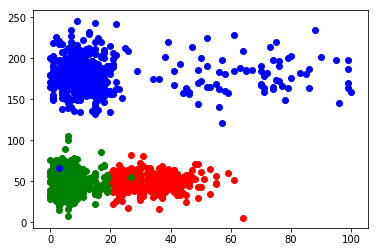

In [31]:
''' plotting the clusters, represented by different colors '''

import matplotlib.pyplot as plt
colors = ['r' , 'g', 'b', 'y']
i = 0
for cluster in c.clusters:
    clusterRows = cluster.getRowsAsNumpy()
    speeds = [x['Speeding_Feature'] for x in clusterRows]
    distances = [x['Distance_Feature'] for x in clusterRows]
    plt.scatter(speeds, distances, c=colors[i])
    i += 1

plt.show()

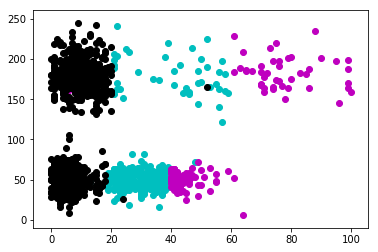

In [35]:
'''plotting the distribution of Compliant, NonCompliant, and Safe data points across the features that
    we arere using to train KMeans '''
    
compliant = [c for c in trainSet if c['OSHA'] == 'Compliant']
noncompliant = [c for c in trainSet if c['OSHA'] == 'NonCompliant']
safe = [c for c in trainSet if c['OSHA'] == 'Safe']

labels = [compliant, noncompliant, safe]

colors = ['c' , 'm', 'k']
i = 0
for cluster in labels:
    speeds = [x['Speeding_Feature'] for x in cluster]
    distances = [x['Distance_Feature'] for x in cluster]
    plt.scatter(speeds, distances, c=colors[i])
    i += 1

# plt.scatter(trainSetSpeeds, trainSetDistances)
plt.show()